In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/zzgr/Desktop/zzgrSandaeteuk/PROJECT GAS STATION/데이터/로우 데이터/산업통상자원부 전국 주유소 등록현황 20211231.CSV', encoding='cp949')

In [4]:
df['구분'].unique()

array(['휴업', '신규등록', '폐업', '등록취소'], dtype=object)

In [5]:
df_2019 = df[df['연도']==2019]
df_2020 = df[df['연도']==2020]
df_2021 = df[df['연도']==2021]

In [6]:
df_2019.reset_index(drop=True, inplace=True)

In [7]:
df_2020.reset_index(drop=True, inplace=True)

In [8]:
df_2021.reset_index(drop=True, inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [10]:
# df = pd.read_csv('test.csv')
# # df[df['구분'] == '휴업']['판매업종류'].expanding().sum()
# names = np.unique( df['구분'].values)
# for i in names:
#   temp = df[df['구분'] == i]['판매업종류'].expanding().sum()
#   df.iloc[temp.index,3] = temp 
# df['변동사유발생연월'] = df['변동사유발생연월일'].apply(lambda x : x[:7])
# df  

df = pd.DataFrame(df_2019.groupby(['변동사유발생연월일','구분'])['판매업종류'].count())
df = df.reset_index()
df['변동사유발생연월일'] = df['변동사유발생연월일'].apply(lambda x : x[:7])

names = np.unique( df['구분'].values)
for i in names:
  temp = df[df['구분'] == i]['판매업종류'].expanding().sum()
  df.iloc[temp.index,2] = temp 


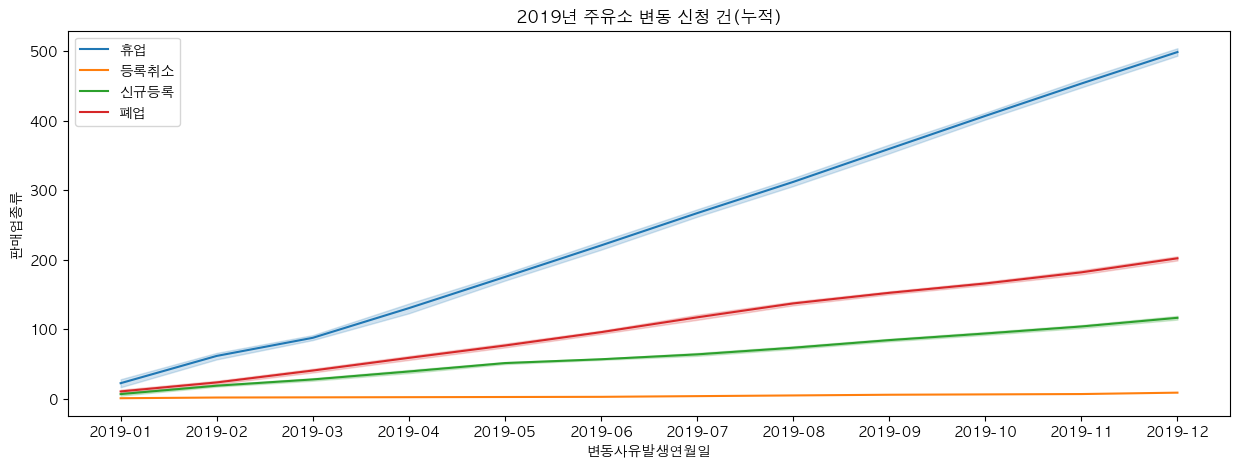

In [11]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x= '변동사유발생연월일', y='판매업종류', hue='구분')
plt.title('2019년 주유소 변동 신청 건(누적)')
plt.legend()
plt.show()

In [20]:
df[df['구분']=='휴업'].sum()

,변동사유발생연월일,구분,판매업종류
0,2019-01,휴업,2
4,2019-01,휴업,5
7,2019-01,휴업,6
8,2019-01,휴업,9
10,2019-01,휴업,13
...,...,...,...
466,2019-12,휴업,509
467,2019-12,휴업,510
470,2019-12,휴업,511
472,2019-12,휴업,515


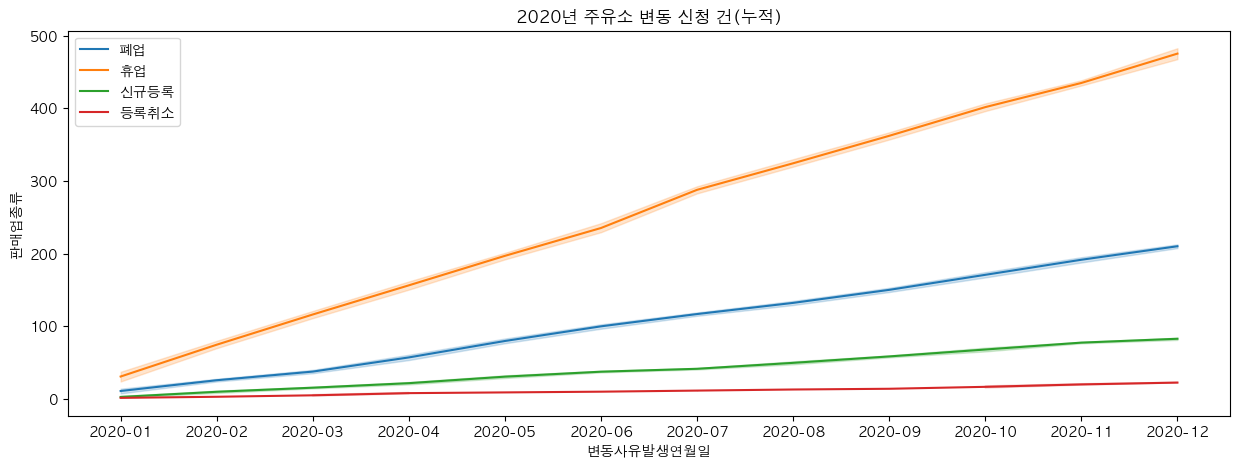

In [12]:
df2 = pd.DataFrame(df_2020.groupby(['변동사유발생연월일','구분'])['판매업종류'].count())
df2 = df2.reset_index()
df2['변동사유발생연월일'] = df2['변동사유발생연월일'].apply(lambda x : x[:7])

names = np.unique( df2['구분'].values)
for i in names:
  temp = df2[df2['구분'] == i]['판매업종류'].expanding().sum()
  df2.iloc[temp.index,2] = temp 


plt.figure(figsize=(15,5))

sns.lineplot(data=df2, x= '변동사유발생연월일', y='판매업종류', hue='구분', color=['r','b','g','y'])
plt.title('2020년 주유소 변동 신청 건(누적)')
plt.legend()
plt.show()

In [13]:
df2.columns = ['변동사유발생연월일','구분','횟수']
df2.to_csv('2020 주유소 폐업 현황.csv')

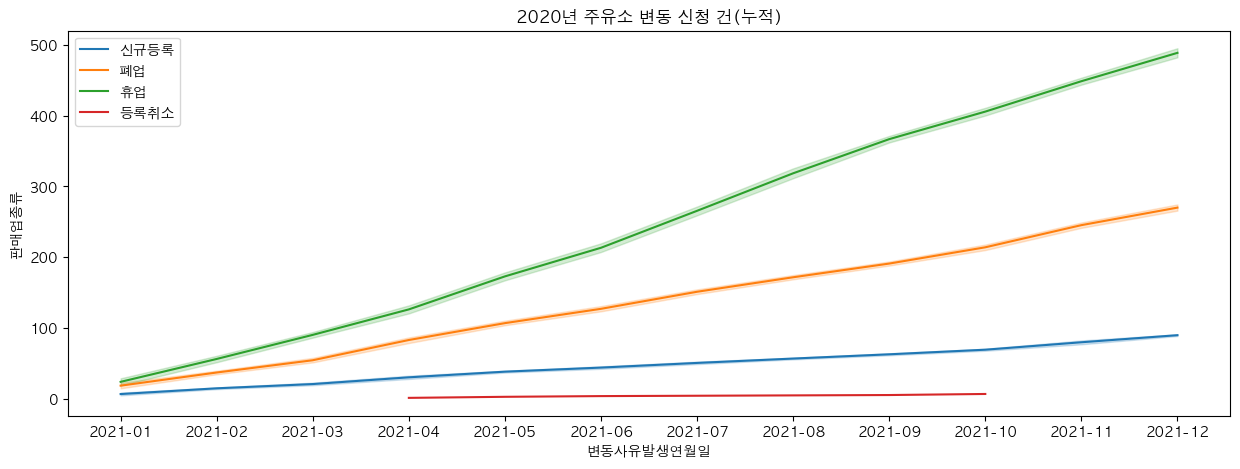

In [14]:
df3 = pd.DataFrame(df_2021.groupby(['변동사유발생연월일','구분'])['판매업종류'].count())
df3 = df3.reset_index()
df3['변동사유발생연월일'] = df3['변동사유발생연월일'].apply(lambda x : x[:7])

names = np.unique( df3['구분'].values)
for i in names:
  temp = df3[df3['구분'] == i]['판매업종류'].expanding().sum()
  df3.iloc[temp.index,2] = temp 


plt.figure(figsize=(15,5))
sns.lineplot(data=df3, x= '변동사유발생연월일', y='판매업종류', hue='구분')
plt.title('2020년 주유소 변동 신청 건(누적)')
plt.legend()
plt.show()

In [15]:
df3.columns = ['변동사유발생연월일','구분','횟수']
df3.to_csv('2021 주유소 폐업 현황.csv')